# 22 | Régressions Linéaires

## Importer des modules utilisés

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
import math

## 3 Résolution du problème des moindres carrés

### S3:
Proposer et implémenter un algorithme de simulation de $Y_{obs}^n := (Y_{obs}(x_1),...,Y_{obs}(x_n)) $ lorsque les $(x_1,...,x_n)$ sont choisis de façon uniforme sur $[0,1]$

**1.** Tout d'abord, or $Y_{obs}(x_i) = Y(x_i) + \epsilon_i$ avec $Y(x_i) = \beta_0 + \beta_1 x$ 

$\epsilon$ est un variable aléatoire $i.i.d$ de loi normale centrée de varience de $\sigma^2$ 

Donc nous pouvons générer la suite de $x_i$ et $\epsilon_i$ par scipy.stats

In [2]:
#Variable Aléatoire de X et epsilon
X = sps.uniform(0,1)
Epsilon = sps.norm(0,0.1)

In [3]:
# Générer les ensembles des x_i et epsilon_i par X et epsilon
x = X.rvs(1000)
epsilon = Epsilon.rvs(1000)

In [13]:
def simulation_Y_obs(b_0, b_1, n, sig):
    ''' b_0 et b_1 sont des paramètres à trouver;
    n est le nombre de observation
    sig est racine de variance de epsilon
    la fonction rend x y_obs et epsilon'''
    X = sps.uniform(0,1)
    Epsilon = sps.norm(0,sig)
    
    x = np.array(X.rvs(n))
#     print("x_shape:", x.shape)
    epsilon = np.array(Epsilon.rvs(n))
    
    y = b_0 + b_1 * x
    
    y_obs = y + epsilon
#     print("y_shape:",y_obs.shape)
    return (x, y_obs, epsilon)

In [14]:
def illustration_Y_obs(x, y_obs):
    '''Renddre la graph de x et y_obs'''
    plt.scatter(x,y_obs)
    plt.xlabel('x')
    plt.ylabel('y_obs')

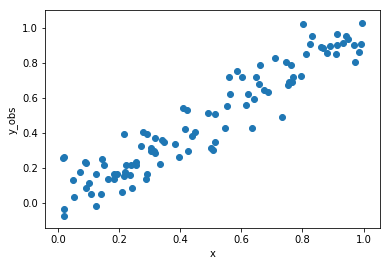

In [15]:
#Illustrer les résultats:
(x, y_obs, eps) = simulation_Y_obs(0,1,100,0.1)
illustration_Y_obs(x, y_obs)

### T1. 
On précisera $X^n$ et $\beta$:
$$ X^n = \left[\begin{matrix}1 & x_0 \cr 1 & x_1 \cr ... & ... \cr 1 & x_n\end{matrix}\right]$$

$$ \beta = \left[\begin{matrix}\beta_0 \cr \beta_1\end{matrix}\right]$$

### T2.
On veut minimiser $\lVert Y^n_{obs} - X^{n}\beta\rVert ^2$ Or
$$ E_{\beta} := \lVert Y^n_{obs} - X^{n}\beta\rVert ^2 = (Y^n_{obs} - X^{n}\beta\ )^T (Y^n_{obs} - X^{n}\beta\ )$$
On dérive cette fonction par rapport au $\beta$:

$$ \dfrac{d E_{\beta}}{d \beta} = 2 X^{nT} (X^n\beta - Y_{obs}^n )$$
Supposons que $(X^n)^T X^n$ est inversible, alors il existe une $\hat \beta$ évident tel que la dérivé s'annule:

$$\hat \beta = ((X^n)^T X^n)^{-1}(X^{n})^T Y^n_{obs} $$

Donc on a montré que $E_{\hat \beta}$ est un extrême de $E_{\beta}$

Il reste à monter que elle est bien un **minimum**. 

$$ \dfrac{d^2 E_{\beta}}{d \beta^2} =  2 X^{nT}X^n $$ 

C'est aussi la matrice hessienne de $E_{\beta}$. Or $2 X^{nT}X^n $ est définie positive car $X^T$ est définie postive.

Soit $x$ un vecteur de dimension n $$ x^T(2X^{nT} X^{n})x = 2(X^n x)^T X^nx > 0$$

Donc $\hat \beta$ est un minimum de $E_{\beta}$

### T3.
Or on a $$ Y_{obs}^n = Y^n + \epsilon^n$$ avec  $$\epsilon^n = \left[\begin{matrix}\epsilon_0 \cr \epsilon_1 \cr ...\end{matrix}\right]$$
Donc $$\hat \beta = ((X^n)^T X^n)^{-1}(X^{n})^T Y^n_{obs} = ((X^n)^T X^n)^{-1}(X^{n})^T (Y^n + \epsilon^n)$$

$$\hat \beta = ((X^n)^T X^n)^{-1}(X^{n})^T (X^n\beta + \epsilon^n)$$

$$\hat \beta = \beta + ((X^n)^T X^n)^{-1}(X^{n})^T\epsilon^n$$
    Donc comme $\epsilon^n$ suit un loi de norme centré et $X$ et $\epsilon$ sont indépendants, donc $$\mathbb{E}( ((X^n)^T X^n)^{-1}(X^{n})^T\epsilon^n ) = \mathbb{E}(((X^n)^T X^n)^{-1}(X^{n})^T) \times \mathbb{E}(\epsilon^n) = 0$$ 
    Donc $$ \mathbb{E} (\hat \beta) = \beta$$
    
 Par le fait que: 
$$ (X^n)^T X^n = \left[\begin{matrix}n & \sum x_i \cr \sum x_i & \sum (x_i)^2 \end{matrix}\right] $$
Donc 
$$ ((X^n)^T X^n )^{-1} = \dfrac{1}{det((X^n)^T X^n)}\left[\begin{matrix} \sum (x_i)^2 & -\sum x_i \cr -\sum x_i & n \end{matrix}\right] $$

En outre, $\epsilon^n$ ets un vecteur gaussien (comparaison $\epsilon_i$ gaussien indépendant)

$\hat{\beta^n}$ est une combinaison linéaire de $\beta^n$ est aussi un vecteur de gaussien. On en déduit la loi de $\hat{\beta^n})$

$$\epsilon^n \sim N(0, I_n \times \sigma^2) $$

$I_n$ est la matrice identique.

$$\hat \beta = ((X^n)^T X^n)^{-1}(X^{n})^T (X^n\beta + \epsilon^n)$$

On note $A = ((X^n)^T X^n)^{-1}(X^{n})^T$

$$\beta^n \sim N(\beta, A I_n \sigma^2 A^T) $$



### T4.
$$\hat \beta - \beta = ((X^n)^T X^n)^{-1}(X^{n})^T\epsilon^n$$
Donc 
$$(\hat \beta - \beta)^T = (\epsilon^n)^T (((X^n)^T X^n)^{-1}(X^{n})^T)^T$$

$$(\hat \beta - \beta)^T = (\epsilon^n)^T X^n (((X^n)^T X^n)^{-1})^T$$

On note $$\Gamma: \tilde{\beta} \mapsto (\hat \beta - \tilde{\beta})^T ((X^n)^T X^n) (\hat \beta - \tilde{\beta})$$

Alors $\Gamma(\beta) $ ce que l'on veut calculer.

$$\Gamma(\beta) = (\hat \beta - \beta)^T ((X^n)^T X^n) (\hat \beta - \beta)  = (\epsilon^n)^T X^n (((X^n)^T X^n)^{-1})^T ((X^n)^T X^n) ((X^n)^T X^n)^{-1}(X^{n})^T\epsilon^n$$

Or on sait que $((X^n)^T X^n)^{-1}$ est symétrique par le calcul avant, donc $((X^n)^T X^n)^{-1}=(((X^n)^T X^n)^{-1})^T$
Donc

$$ \ \ \ \Gamma(\beta)  = (\epsilon^n)^T X^n ((X^n)^T X^n)^{-1}(X^{n})^T\epsilon^n$$

On remplace $((X^n)^T X^n)^{-1} $ par $\dfrac{1}{det((X^n)^T X^n)}\left[\begin{matrix} \sum (x_i)^2 & -\sum x_i \cr -\sum x_i & n \end{matrix}\right]$

On note $M = X^n ((X^n)^T X^n)^{-1}(X^{n})^T$ 

$$ det((X^n)^T X^n)M[i,j] = \sum x_i^2 - (x_i + x_j) \sum x_i + n x_i x_j $$

$$ \Gamma = (\epsilon_n)^T M \epsilon_n$$

$$ \Gamma(\beta) = \frac{1}{n} (\sum \epsilon)^2 + \dfrac{ (\dfrac{\sum x_i \epsilon_i}{n} - \dfrac{\sum x_i}{n} \dfrac{\sum \epsilon_i}{n})^2}{ \dfrac{\sum x_i^2}{n} -(\dfrac{\sum x_i}{n})^2 }$$

$\frac{1}{\sqrt n}\sum \epsilon $ suit la loi normale de variance $\sigma $

D'après la loi forte de grand nombre $\dfrac{\sum x_i \epsilon_i}{n} - \dfrac{\sum x_i}{n} \dfrac{\sum \epsilon_i}{n}$ converge presque partout vers $\mathbb{E}(X \epsilon) - \mathbb{E}(X)\mathbb{E}(\epsilon) = Cov(X, \epsilon) = 0$


**Donc $\Gamma$ suit une loi de chi-square distribution $\chi_2^2$**

On revient à la définition de quantile à l'ordre r

Comme la loi de chi-square distribution $\chi_2^2$ est à densité. Alors $q^{\chi_2^2} = F^{-1}$ F est la fonction de répartition de $\chi_2^2$ 

$q^{\chi_2^2}(1-\alpha)$ est un point qui sépare les deux partie. Donc $\mathbb{P}(\Gamma \leq q^{\chi_2^2}(1-\alpha) ) = 1 - \alpha$

**Donc on a $\mathbb{P}(\beta \in \epsilon_{\alpha, n} ) = 1 - \alpha$**






### S2.

Tout d'abord, nous cherchons la quantile de $\alpha = 0.05$. 

$i.e.$ Si $F$ est la fonction de répartiton de $\chi_2^2$ On cherche $F^{-1}(0.95)$

In [16]:
def quantile(alpha):
    '''Chercher la valeur approximate de quantile(alpha)'''
    # Definition de loi
    Chi_2 = sps.chi2(2)
    # Fonction de répartition
    F = Chi_2.cdf
    for i in range(10000):
        num = i/1000
        num_avant = (i-1)/1000
        if F(num_avant) < (1-alpha) and F(num) > (1-alpha):
            return num

#### test de function avec $\alpha = 0.05$ 

In [18]:
# Calcule la quantile de 0.005
quantile(0.05)

5.992

#### Calcule de la distribution de $\Gamma$

In [19]:
def gamma(b_t0,b_t1, b0,b1, n, sigma):
    '''Calculer la valeur distribution x et epsilon'''
    '''b = (b0, b1)'''
    '''b_t = (b_t0, b_t1)'''
    '''rendre gamma de b_t dans l'ellpsoide de b ''' 
    x, y_obs, epsilon = Simulation_Observation(b0,b1,n,sigma)
    x = np.vstack((np.ones(len(x)), x)).transpose()
    b = np.matrix([[b0],[b1]])
    b_t = np.matrix([[b_t0],[b_t1]])
    
    M = np.mat(np.dot(x.transpose(), x))
    # la taile de M est 2 * 2
    
    #calcul beta chapeau
    M_inv = M.I
    y_obs = np.matrix(y_obs)
    b_c = np.dot( np.dot(M_inv, x.transpose()), y_obs.transpose() )

    #calcul de Gamma
    G = 1/sigma * np.dot(np.dot( (b_c - b_t).transpose(), M),(b_c - b_t) )
    G = np.array(G)
    return G[0][0]

#### Cherche du ($\beta^T_0$, $\beta^T_1$) tel que dans l'ellipsoide

In [21]:
def check_ellipsoid(b_t0, b_t1, b0, b1,sigma=0.1, alpha=0.05, n=1000):
    '''Tester si b0, b1 est dans l'ellipsoid 
    rendre True si b = (b0, b1) est dans l'ellipsoid
    False sinon'''
    q = quantile(alpha)
    G = gamma(b_t0, b_t1, b0,b1,n,sigma)
    if G <= q:
        return True
    else:
        return False

Maintenant notre but est de trouver les $\beta^{t}$s tels que $\Gamma(\beta^{t}) =\leq q^{\chi^2_2}(1-\alpha)$
$i.e.$ On cherche les points de $\beta^T$ tels que `check_ellipsoid` return `True`

#### Quelques calculs maths utiles

$\Gamma(\beta^t) = (\hat \beta - \beta^t)^T ((X^n)^T X^n) (\hat \beta - \beta^t)$ si on note $\hat \beta - \beta^t = [a,b]$

Alors 
$$ \Gamma(\beta^t) = [a,b] ((X^n)^T X^n) [a,b]^T$$

$$ \Gamma(\beta^t) = n a^2 + 2 (\sum x_i) ab + \sum x_i^2 b^2 $$

Alors on cherche $(a,b)$ tels que: 

$$ n a^2 + 2 (\sum x_i) ab + \sum x_i^2 b^2 \leq q^{\chi^2_2}(1-\alpha) = 5.992 $$

$$ a^2 + 2 \dfrac{(\sum x_i)}{n} ab + \dfrac{\sum x_i^2 }{n}b^2 - \dfrac{5.992}{n} \leq 0 $$

Avec tous les $x_i$ fixées c'est une inégalité ellipse

### Illustration de l'ellipse

In [24]:
def draw_ellipse(b0,b1,n,sigma=0.1,alpha=0.05):
    
    '''Pour b = (b0, b1), sigma = 0.1 On cherche à dessiner la ellipse: '''
    x, y_obs, epsilon = simulation_Y_obs(b0,b1,n,sigma)
    
    x = np.vstack((np.ones(len(x)), x)).transpose()
    b = np.matrix([[b0],[b1]])
    
    M = np.mat(np.dot(x.transpose(), x))
    M_inv = M.I
        
    # calculer b_chapeau
    y_obs = np.matrix(y_obs)
    b_c = np.dot( np.dot(M_inv, x.transpose()), y_obs.transpose() )
    b_c = np.array(b_c)
    
    b_c0 = b_c[0][0]
    b_c1 = b_c[1][0]
    #calculer sum(x_i)
    S_x = sum(x)[1]
    #calculer sum(x_i^2)
    S_x_2 = sum(x*x)[1]
    #Illustrer l'ellipse
    
    delta = 0.025
    a = np.arange(-3.0, 3.0, delta)
    b = np.arange(-3.0, 3.0, delta)
    
    A, B = np.meshgrid(a, b)
    C = (A - b_c0)**2 + 2 * S_x/n *(A-b_c0)*(B-b_c1) + S_x_2/n * (B-b_c1)**2 - 5.992/n
    fig, ax = plt.subplots()
    CS = ax.contour(A, B, C,0)
    ax.clabel(CS, inline=1, fontsize=10)
    ax.set_title('ellipsoide de confiance')
    plt.xlabel("beta_0")
    plt.ylabel("beta_1")
    plt.grid( color='lightgrey')
    

#### $\beta = (0,1)$ avec $n = 100$

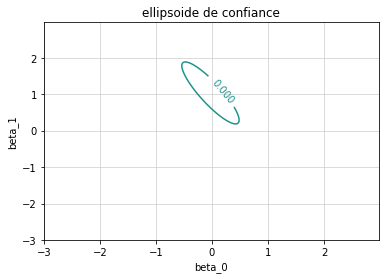

In [25]:
draw_ellipse(0,1,100)

#### $\beta = (1,0)$ avec $n = 100$

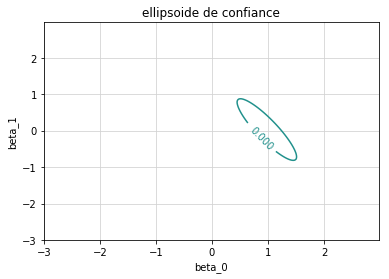

In [26]:
draw_ellipse(1,0,100)

#### $\beta = (0,1)$ avec $n = 100$

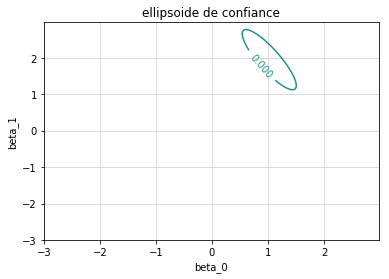

In [27]:
draw_ellipse(1,2,100)

On va essayer avec different de n:
#### $\beta = (0,1)$ avec 500 ,1000, 10000

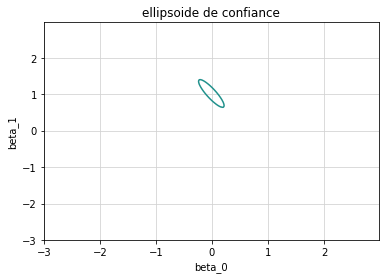

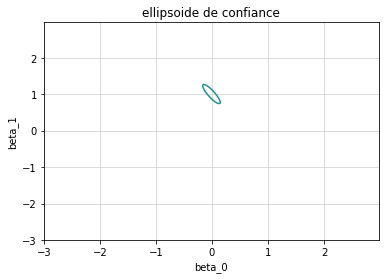

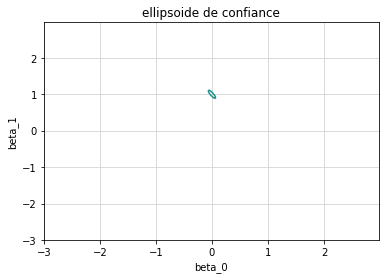

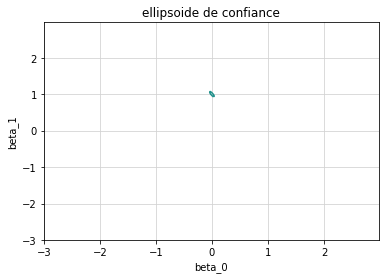

In [28]:
draw_ellipse(0,1,500)
draw_ellipse(0,1,1000)
draw_ellipse(0,1,5000)
draw_ellipse(0,1,10000)

#### On constate que la taille de l'ellipsoide devient de plus en plus petit avec la croissance de n

*Explication mathématiques:*

On a l'équation d'ellipse $$ a^2 + 2 \dfrac{(\sum x_i)}{n} ab + \dfrac{\sum x_i^2 }{n}b^2 - \dfrac{5.992}{n} \leq 0 $$

D'après la loi forte de grand nombre $ \dfrac{(\sum x_i)}{n}$ converge presque surement vers $\mathbb{E}(X) = \dfrac{1}{2}$;  $\dfrac{\sum x_i^2 }{n}$  converge presque surement vers $\mathbb{E}(X^2) = \dfrac{1}{3}$

Donc quand n est assez grand, pour presque surement $\omega$, l'équation est équivalent à 

$$ a^2 + ab + 1/3b^2 - \dfrac{5.992}{n} \leq 0 $$

C'est évident que le $n$ est plus grand, la taille de l'ellipse est plus petit


## 4 Convergence de l'estimateur

### S3. Simulation de éléments de $Y^n_{obs}$

Pour réutiliser les $x_i$ lorsque l'on change $n$, on va modifier la suite $(x_i)_{n\in N}$ à statique.

On va créer une classe pour stocker tous les valeurs de $x_i$ et $\epsilon_i$

In [29]:
class X_stocker(object):
    def __init__(self, sigma, n):
        self.X_dis = sps.uniform(0,1)
        self.Epsilon_dis = sps.norm(0,sigma)
        self.x = self.X_dis.rvs(n)
        self.epsilon = self.Epsilon_dis.rvs(n)
        self.size = n;
        
        
    def get_X_n(self, n):
        '''rendre les premiers n elements dans le stocker'''
        if n > self.size:
            self.add_point(n)
        return self.x[:n]
    
    
    def get_Y_obs(self,b_0, b_1, n):
        # si n > size, on ajoute des points de x
        if n > self.size:
            self.add_point(n)
        x_1 = self.x[:n]
        e_1 = self.epsilon[:n]
        
        y = b_0 + b_1 * x_1
        y_obs = y + e_1
        return y_obs;
            
        
    def add_point(self, m):
        '''Ajouter des POINTS DANS LA SUITE DE x_i'''
        '''m is the size of the suite après ajout'''
        
        if m <= self.size:
            print("la taille de suite finale doit être plus grande que la taille initiale")
            return;
        x_a = self.X_dis.rvs(m-self.size)
        epsilon_a = self.Epsilon_dis.rvs(m-self.size)
        self.x = np.append(self.x, x_a)
        self.epsilon = np.append(self.epsilon , epsilon_a)
        self.size = m

In [30]:
# Création d'une instance de X_stocker
stocker = X_stocker(0.1, 10)
y_obs = stocker.get_Y_obs(1,1,5)

In [31]:
def draw_x_and_y(stocker,b_0,b_1, n):
    if n > stocker.size:
        stocker.add_point(n)
    x = stocker.x[:n]
    plt.scatter(x, stocker.get_Y_obs(b_0,b_1,n))
    plt.xlabel('x')
    plt.ylabel('y_obs')

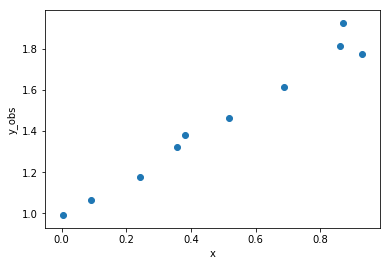

In [32]:
draw_x_and_y(stocker, 1,1,10)

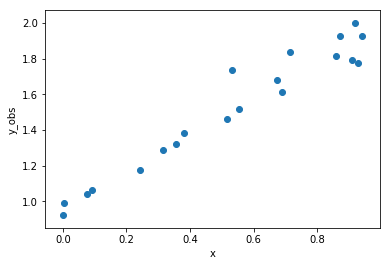

In [33]:
#On ajoute 10 points
draw_x_and_y(stocker, 1,1, 20)

**On constate que les premiers 10 points sont réutilisés**

### T5. Montrons par la loi forte de grand nombre 

Par le calcul précédent
$$ (X^n)^T X^n = \left[\begin{matrix}n & \sum x_i \cr \sum x_i & \sum (x_i)^2 \end{matrix}\right] $$

Or chaque $x_i$ suit la loi uniforme de $[0,1]$

On utilise la loi forte de grand nombre:

$ \dfrac{(\sum_{i=0}^n x_i)}{n}$ converge presque sûrement vers $\mathbb{E}(X)$

$ \dfrac{(\sum_{i=0}^n x_i^2)}{n}$ converge presque sûrement vers $\mathbb{E}(X^2)$

En utilisant la propriété de la loi uniforme, $\mathbb{E}(X) = \dfrac{1+0}{2} = \dfrac{1}{2}$

$\mathbb{E}(X^2) = \int_0^1 x^2 dx = \dfrac{1}{3}$

Donc on a presque sûrement: 

$$\lim_{n \to \inf} \dfrac{1}{n} (X^n)^T X^n = \left[\begin{matrix}1 & \sum_0^n x_i/n \cr \sum_0^n x_i/n & \sum_0^n (x_i)^2/n \end{matrix}\right] = \left[\begin{matrix}1 & 1/2 \cr 1/2 & 1/3 \end{matrix}\right]$$

**Maintenant on revient au calcul de l'ellipsoide de confiance**

$$ n a^2 + 2 (\sum x_i) ab + \sum x_i^2 b^2 \leq q^{\chi^2_2}(1-\alpha) \leq 0$$

Avec $(a,b) = \hat\beta^n - \beta$

Alors quand n tend vers infinie, elle est équivalente presque sûrement à:

$$ n( a^2 + 2 \dfrac{1}{2} ab + \dfrac{1}{3} b^2 ) \leq \sigma q^{\chi^2_2}(1-\alpha)$$

$$ a^2 +  ab + \dfrac{1}{3} b^2 \leq \sigma q^{\chi^2_2}(1-\alpha)/n $$

$$ (a+\dfrac{b}{2})^2 + \dfrac{1}{12} b^2 \leq \sigma q^{\chi^2_2}(1-\alpha)/n $$

Soit $\alpha>0$, quand $n \to \inf$, $\sigma q^{\chi^2_2}(1-\alpha)/n \to 0$ ,donc $(a+\dfrac{b}{2})^2 + \dfrac{1}{12} b^2 \to 0$

Donc $b \to 0, a \to -b/2 = 0 $ C'est-à-dire, $\hat\beta^n \to \beta$

Donc presque sûrement, $\mathbb{P}(\lim_{n \to inf} \hat\beta^n = \beta) = 1$

In [35]:
def distance_b_and_b_chapeau(stocker, b0, b1, sigma, n):
    
    '''Rendre la vecteur de b à b_chapeu
    b_chapeau est calculé par les donnée dans le stocker'''
    b = np.array([b0,b1])
    x = stocker.get_X_n(n)
    x = np.vstack((np.ones(len(x)), x)).transpose()
    M = np.mat(np.dot(x.transpose(), x))
    M_inv = M.I
        
    # calculer b_chapeau
    
    y_obs = np.matrix(stocker.get_Y_obs(b0,b1,n))
    
    #calcul beta chapeau
    y_obs = np.matrix(y_obs)
    b_c = np.dot( np.dot(M_inv, x.transpose()), y_obs.transpose() )
    b_c = np.array(b_c)
    return ( (b_c[0]-b0)[0], (b_c[1]-b1)[0] )

In [36]:
distance_b_and_b_hat(stocker, 1,1, 0.1, 100)

(-0.02757798655931265, 0.03452390365114644)

In [37]:
def draw_evaluation_distance(stocker, b0, b1, sigma):
    
    d= []
    n= []
    for i in range(100,5000,10):
        c = distance_b_and_b_hat(stocker, b0, b1, sigma, i)
        d.append(math.sqrt(c[0]*c[0] + c[1]*c[1]))
        n.append(i)
    plt.plot(n, d)
    plt.ylabel('distance')
    plt.xlabel('n')

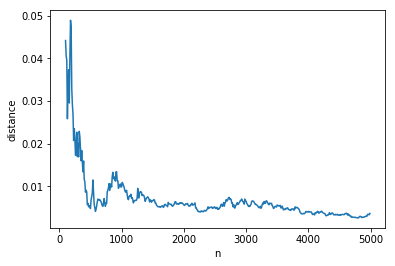

In [38]:
draw_evaluation_distance(stocker, 1,1,0.1)

### Calcul réculsif des $(\hat \beta)^n$
### T6. 
D'après le calcul précédent, 

$$ (X^n)^T X^n = \left[\begin{matrix}n & \sum x_i \cr \sum x_i & \sum (x_i)^2 \end{matrix}\right] $$

Donc $$ (X^{n+1})^T X^{n+1} = (X^n)^T X^n + \left[\begin{matrix} 1 & x_{n+1} \cr x_{n+1} & (x_{n+1})^2 \end{matrix}\right] $$

On va essayer d'écrire $\left[\begin{matrix} 1 & x_{n+1} \cr x_{n+1} & (x_{n+1})^2 \end{matrix}\right]$ sous la forme $UCV$

On constate bien que 

$$\left[\begin{matrix} 1 & x_{n+1} \cr x_{n+1} & (x_{n+1})^2 \end{matrix}\right] = \left[\begin{matrix} 1 \cr x_{n+1}  \end{matrix}\right]
\left[\begin{matrix} 1 & x_{n+1}  \end{matrix}\right] $$

Donc on peut prendre $C = [1], U = \left[\begin{matrix} 1 \cr x_{n+1}  \end{matrix}\right], V = \left[\begin{matrix} 1 & x_{n+1}  \end{matrix}\right]$

$C$ est inversible

et puis $$ ((X^n)^T X^n )^{-1} = \dfrac{1}{det((X^n)^T X^n)}\left[\begin{matrix} \sum (x_i)^2 & -\sum x_i \cr -\sum x_i & n \end{matrix}\right] $$

Donc $$V ((X^n)^T X^n )^{-1} U  = \dfrac{1}{det((X^n)^T X^n)} (n + 2 x_{n+1} \sum^n_{i=1}x_i + x^2_{n+1} \sum^n_{i=1}x_i^2)$$

Donc $ C^{-1} + V ((X^n)^T X^n )^{-1} U = 1 + \dfrac{1}{det((X^n)^T X^n)} (n + 2 x_{n+1} \sum^n_{i=1}x_i + x^2_{n+1} \sum^n_{i=1}x_i^2)$ comme $n, x_i (\forall i \in \mathbb{N})$ sont strictement positive, $ C^{-1} + V ((X^n)^T X^n )^{-1} U >0 $ donc inversible 

On prend $\alpha  =  C^{-1} + V ((X^n)^T X^n )^{-1} U$

Alors

$$(C^{-1} + V ((X^n)^T X^n )^{-1} U)^{-1} = \dfrac{{det((X^n)^T X^n)}}{{det((X^n)^T X^n)} + n + 2 x_{n+1} \sum^n_{i=1}x_i + x^2_{n+1} \sum^n_{i=1}x_i^2 } = \dfrac{1}{\alpha}$$

$$ (C^{-1} + V ((X^n)^T X^n )^{-1} U)^{-1} = \dfrac{n \sum_{i=1}^n x_{i}^2  - \sum_{i=1}^n x_{i} \sum_{i=1}^n x_{i}}{n \sum_{i=1}^n x_{i}^2  - \sum_{i=1}^n x_{i} \sum_{i=1}^n x_{i} + n + 2 x_{n+1} \sum^n_{i=1}x_i + x^2_{n+1} \sum^n_{i=1}x_i^2 } \in \mathbb{R}$$

alors on prend $v = (X^n)^T X^n )^{-1} U $

$$ v =\dfrac{1}{det((X^n)^T X^n)} \left[\begin{matrix} \sum_{i=1}^n x_i^2 - x_{n+1}\sum_{i=1}^n x_i \cr - \sum_{i=1}^n x_i +n x_{n+1} \end{matrix}\right] $$

comme $(X^n)^T X^n )^{-1}$ est symétrique et $U^T = V$ alors $v^T = V (X^n)^T X^n )^{-1}$

Par la formule de Woodbury, 

$$ ((X^{n+1})^T X^{n+1})^{-1} = ((X^n)^T X^n )^{-1} - (X^n)^T X^n )^{-1} U (C^{-1} + V ((X^n)^T X^n )^{-1} U)^{-1}V (X^n)^T X^n )^{-1}$$

$$ = ((X^n)^T X^n )^{-1} - \dfrac{1}{\alpha}vv^T $$

### s5:  Algoritme de construire $\hat \beta^{n}$ récursivement

In [39]:

class Stocker_rec(X_stocker):
    
    '''On établit un stocker_rec pour stocker les inverse de ((X^n)^TX)^{-1}'''
    
    def __init__(self, sigma, n, b0, b1):
        X_stocker.__init__(self,sigma, n)
        self.XtX = []
        b = np.array([b0,b1])
        for i in range(1,n+1):
            x_1 = self.get_X_n(i)
            x = np.vstack((np.ones(len(x_1)), x_1)).transpose()
            M = np.mat(np.dot(x.transpose(), x))
            self.XtX.append(M)
#         print(self.XtX)
# ''' Maintenant on essayer de construire la suite de (X^n)^T X^n)^{-1} recursivement; '''
        self.XtX_inv = [self.XtX[0].I]
        x_1 = self.get_X_n(n)
        for i in range(1,n):
            U = np.mat([[1],[x_1[i]]])
            V = np.mat([1, x_1[i]])
#             print(U, V)
#             print(self.XtX_inv[i-1])
            N = np.dot( np.dot(V, self.XtX_inv[i-1]), U)
#             print(N)
            v = np.dot(self.XtX_inv[i-1], U)
            v_T = np.dot(V, self.XtX_inv[i-1])
            alpha = 1 + np.array(N)[0][0]
#             print(v, v_T)
            self.XtX_inv.append(self.XtX_inv[i-1] - 1/alpha* np.dot(v, v_T))
    
# ''' Finalement, calculer les beta^hat_n '''

        self.beta_hat = []
        for i in range(1,n):
            x = self.get_X_n(i)
            x = np.vstack((np.ones(len(x)), x)).transpose()
            M_inv = self.XtX_inv[i-1];
            y_obs = np.matrix(self.get_Y_obs(b0,b1,i))
            b_hat = np.dot( np.dot(M_inv, x.transpose()), y_obs.transpose() )
            b_hat = np.array(b_hat)
            self.beta_hat.append((b_hat[0][0], b_hat[1][0]));
            
    def get_beta_hat(self,n):
        if n > self.size:
            print("the number acquired is bigger than the size of the stocker")
            return 
        else:
            return self.beta_hat

On utilise cette classe à stocker les valeurs de beta_hat_n 

In [40]:
stocker_2 = Stocker_rec(0.1, 5000, 1, 1)

In [41]:
# Maintenant on essaye de présent la évoluation de beta_hat 
def draw_evaluation_scatter(stocker):
    
    h = []
    v = []
    c = stocker.get_beta_hat(5000)
    for i in range(100,5000,100):
        
        h.append(c[i][0])
        v.append(c[i][1])
    plt.scatter(h, v)
    plt.ylabel('beta_0')
    plt.xlabel('beta_1')

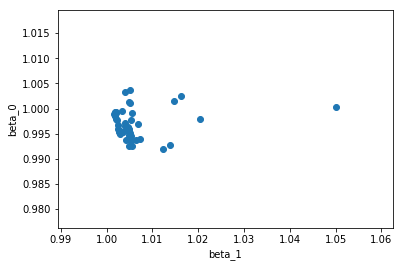

In [42]:
draw_evaluation_scatter(stocker_2)

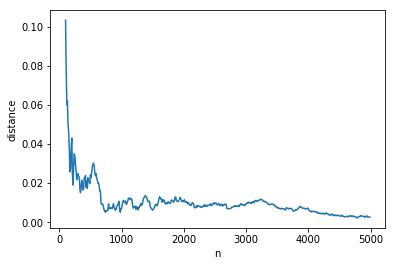

In [43]:
draw_evaluation_distance(stocker_2,1,1,0.1)

**En comparaison avec le stocker nons récursives, la convergence est plus rapid**

On teste les résultats avec $\beta = (0,1), (1,0) (1,2)$ et $\sigma = 0.1$

### $\beta = (0,1)$ avec $n = 5000$

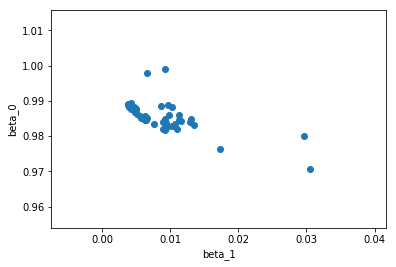

In [47]:
stocker_2 = Stocker_rec(0.1, 5000, 0, 1)
draw_evaluation_scatter(stocker_2)

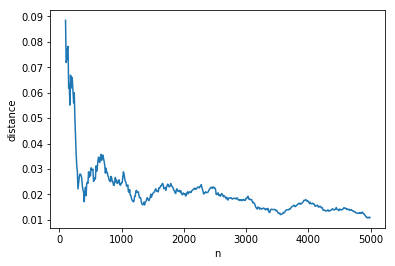

In [48]:
draw_evaluation_distance(stocker_2,0,1,0.1)

### $\beta = (1,0)$ avec $n = 5000$

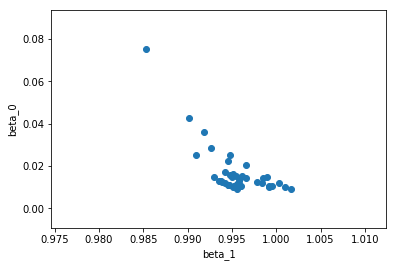

In [51]:
stocker_2 = Stocker_rec(0.1, 5000, 1, 0)
draw_evaluation_scatter(stocker_2)

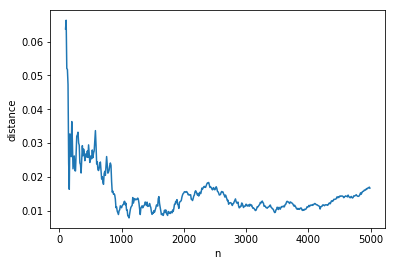

In [52]:
draw_evaluation_distance(stocker_2,1,0,0.1)

### $\beta = (1,2)$ avec $n = 5000$

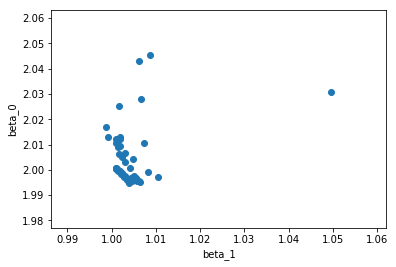

In [53]:
stocker_2 = Stocker_rec(0.1, 5000, 1, 2)
draw_evaluation_scatter(stocker_2)

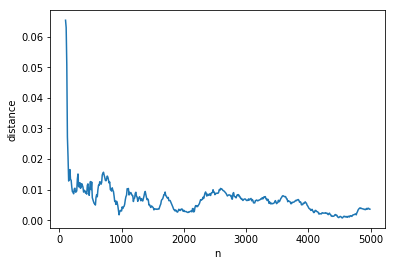

In [55]:
draw_evaluation_distance(stocker_2,1,2,0.1)

## 5 Test des résidus

### T7. 
$$Y^n_{obs}=X^n\beta+\varepsilon^n$$

$$\hat\varepsilon^n=(Id(n)-X^n((X^n)^TX^n)^{-1}(X^n)^T)(X^n\beta+\varepsilon^n)$$

$$\hat\varepsilon^n=X^n\beta-X^n((X^n)^TX^n)^{-1}(X^n)^T)X^n\beta+(Id(n)-X^n((X^n)^TX^n)^{-1}(X^n)^T)\varepsilon^n$$

$$\hat\varepsilon^n=(Id(n)-X^n((X^n)^TX^n)^{-1}(X^n)^T)\varepsilon^n$$

Donc on a

$$ \frac{1}{\sigma^2}\|\hat\epsilon^n\|^2=\|(Id(n)-X^n((X^n)^TX^n)^{-1}(X^n)^T)\frac{\varepsilon^n}{\sigma}\|^2$$

Or notons $N=\frac{\varepsilon^n}{\sigma}$,on a $N\sim \mathcal N(0,\sigma^2)$

Notons $P^{}_1=X^n((X^n)^TX^n)^{-1}(X^n)^T$

$$P^{}_1\circ P^{}_1=X^n((X^n)^TX^n)^{-1}(X^n)^TX^n((X^n)^TX^n)^{-1}(X^n)^T=X^n((X^n)^TX^n)^{-1}(X^n)^T=P^{}_1$$

Donc $P^{}_1$ est la matrice d'une projection

Soit $Z\in\mathbb{R}^n$

$$P^{}_1(Z)=X^n((X^n)^TX^n)^{-1}(X^n)^TZ$$

Notons $\hat Z=((X^n)^TX^n)^{-1}(X^n)^TZ$

$$P^{}_1(Z)=X^n[0]\hat Z[0]+X^n[1]\hat Z[1]$$

Donc $P^{}_1$ est la matrice d'une projection sur un sous-espace vectoriel $L'$ de $\mathbb{R}^n$ de dimension 2

Alors notons $P^{}_2=Id(n)-P^{}_1$, $P^{}_2$ est la matrice d'une projection sur un sous-espace vectoriel $L$ de $\mathbb{R}^n$ de dimension $n-2$

$$ \frac{1}{\sigma^2}\|\hat\epsilon^n\|^2=\|P^{}_2N\|^2$$

Prenons$(u^{}_1,u^{}_2...u^{}_{n-2})$ une base orthonormé de $L$ et $(u^{}_{n-1},u^{}_n)$ une base orthonormé de $L'$

$$ \|P^{}_2N\|^2=\sum_{i=1}^{n-2}<N,u^{}_i>^2$$

Ou $<N,u^{}_i>^2=U^TN$, avec U la matrice de passage de la base canonique à la base $(u^{}_1,u^{}_2...u^{}_n)$

Alors $U^TN\sim \mathcal N(0,UId(n)U^T)=\mathcal N(0,Id(n))$

$$ \frac{1}{\sigma^2}\|\hat\epsilon^n\|^2=\sum_{i=1}^{n-2}(U^TN)^2\sim \chi^2(n-2) $$

Finalement on a $$ \frac{1}{\sigma^2}\|\hat\epsilon^n\|^2\sim \chi^2(n-2) $$

### S6.
Posons
$$Int(n):=\{ \frac{1}{\sigma^2}\|\hat\epsilon^n\|^2,\frac{1}{\sigma^2}\|\hat\epsilon^n\|^2\leq q^{\chi^2_{n-2}}(1-\alpha)\}$$
D'abord, calculons quantile de $\chi^2_{n-2}$

In [61]:
def quantile2(alpha,d):
    
    '''Chercher la valeur approximate de quantile(alpha)'''
    # Definition de loi
    Chi_2 = sps.chi2(d)
    # Fonction de répartition
    F = Chi_2.cdf
    for i in range(100000):
        num = i/1000
        num_avant = (i-1)/1000
        if F(num_avant) < (1-alpha) and F(num) > (1-alpha):
            return num

pour $n=10,\alpha=5\%$

In [62]:
quantile2(0.05,8)

15.508

Calculons le pourcentage des résidus qui tombent dans *Int(n)* parmi M observations 

In [63]:
def test_residus(M,b_0,b_1,n=10,sigma=0.1,alpha=0.05):
    count=0
    Quantile=quantile2(alpha,n-2)
   #calculons combien de residu tombe sur Int(n) parmi les M residus
    for i in range(M):
    # creer une liste de (x,y,y_obs,epsilon) tel que <y=beta_0+x*beta_1> et <y_obs=y+epsilon>
        X = sps.uniform(0,1)
        Epsilon = sps.norm(0,sigma)  
    
        x = np.array(X.rvs(n))
        epsilon = np.array(Epsilon.rvs(n))
        y = b_0 + b_1 * x
        y_obs = y + epsilon

        # definir les matrice (Y,X) tel que <Y=X*BETA>
        x_m = np.vstack((np.ones(len(x)), x)).transpose()
        y_m=y.transpose()
        y_obs_m=y_obs.transpose()

        # calculons beta_capeau 
        b_c = np.dot(np.dot(np.linalg.inv(np.dot(x_m.transpose(), x_m)), x_m.transpose()) , y_obs_m )

        # calculons y_chapeau avec y_chapeau=X*beta_chapeau
        y_c = np.dot(x_m,b_c.transpose())

        #calculons le residu 
        r=np.subtract(y_obs,y_c)

        #testons si le residu tombe dans Int(n)
        n_r=np.linalg.norm(r)
        if  math.pow(n_r, 2)/math.pow(sigma, 2)<=Quantile:
            count=count+1
    return count/M
    

#### $\beta = (0,1)$  $M=1000$

In [184]:
test_residus(1000,0,1,n=10,sigma=0.1,alpha=0.05)

0.947

#### $\beta = (1,0)$   $M=1000$

In [185]:
test_residus(1000,1,0,n=10,sigma=0.1,alpha=0.05)

0.943

#### $\beta = (2,1)$  $M=1000$

In [186]:
test_residus(1000,1,2,n=10,sigma=0.1,alpha=0.05)

0.953

**Les pourcentages sont bien environ $95\%$**